# Métodos no supervisados y detección de anomalías: tarea de asignación (semana 3)
Ya conoces una gran variedad de métodos de agrupamiento y cómo pueden configurarse y ejecutarse utilizando las librerías *PyClustering* y *scikit-learn*. El objetivo de esta tarea es realizar el proceso completo de análisis de grupos, desde que se carga un conjunto de datos hasta que se valida el resultado del agrupamiento.

## Descripción de la tarea
La tarea consta de tres apartados:
1. Selección y análisis de un conjunto de datos.
2. Ejecución de dos métodos de agrupamiento.
3. Evaluación de los resultados obtenidos.

## Instrucciones
En este *notebook* no se presenta parte del código desarrollado, pero sí se indican los pasos mínimos que debes seguir para completar la tarea. Puedes añadir otras celdas de código según sea necesario, pero respetando la organización de apartados propuesta. Tendrás que elegir entre trabajar con *PyClustering* o con *scikit-learn*.


## 1. Selección y análisis de un conjunto de datos
Paso 1.1: Importa los paquetes necesarios.

In [123]:
#COMPLETAR
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.patches as mpatches
from sklearn.metrics import silhouette_score

Paso 1.2: Carga un conjunto de datos de entre los disponibles en la librería seleccionada. Puedes encontrarlos en:


*   PyClustering: https://github.com/annoviko/pyclustering/tree/master/pyclustering/samples
*   scikit-learn: https://scikit-learn.org/stable/datasets.html

Debes escoger un conjunto de datos etiquetado para que posteriormente se puedan aplicar medidas de validación externa.



In [124]:
#COMPLETAR
data = load_wine()

Paso 1.3: Muestra información acerca de la distribución de las características en el conjunto de datos elegido.

In [125]:
#COMPLETAR
wine_data = pd.DataFrame(data.data, columns = data.feature_names)

wine_data["class"] = data.target

print(wine_data.isnull().sum())

wine_data.describe().T

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


Paso 1.4: Selecciona dos características para llevar a cabo el agrupamiento, y muestra la distribución de los puntos con alguna gráfica.

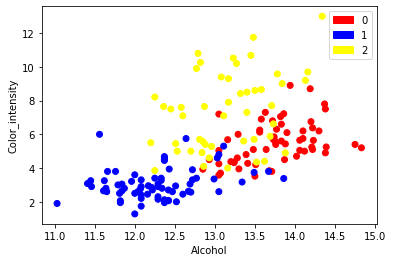

In [126]:
#COMPLETAR
colormap = np.array(['#FF0000', '#0000FF', '#FFFF00'])

class_0 = mpatches.Patch(color='#FF0000', label='0')
class_1 = mpatches.Patch(color='#0000FF', label='1')
class_2 = mpatches.Patch(color='#FFFF00', label='2')

x = wine_data["alcohol"]

y = wine_data["color_intensity"]

labels_ = wine_data["class"]

plt.scatter(x,y, c=colormap[labels_])
plt.legend(handles=[class_0,class_1, class_2])
plt.xlabel("Alcohol")
plt.ylabel("Color_intensity")
plt.show()

Paso 1.5: Si es necesario, realiza un preprocesado de las variables (eliminar valores perdidos, escalar valores, etc).

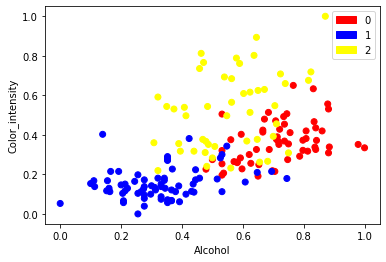

In [127]:
#COMPLETAR

scaler = MinMaxScaler()

old_shape = x.shape

x = scaler.fit_transform(x.values.reshape(-1, 1)).reshape(old_shape)

y = scaler.fit_transform(y.values.reshape(-1, 1)).reshape(old_shape)

plt.scatter(x,y, c=colormap[labels_])
plt.legend(handles=[class_0,class_1, class_2])
plt.xlabel("Alcohol")
plt.ylabel("Color_intensity")
plt.show()

*Añade aquí una breve explicación de las decisiones tomadas en el apartado 1.*

Para esta actividad, se ha seleccionado el conjunto de datos [Wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). Este conjunto de datos cuenta con un total de 178 instancias y 13 atributos, entre los se encuentra el atributo a predecir. Este atributo puede tomar 3 valores, 0, 1 ó 2. Se ha elegido este conjunto de datos ya que cuenta con las etiquetas reales de las instancias y esto nos permitirá utilizar métricas de validación externa.

## 2. Ejecución de métodos de agrupamiento
Paso 2.1: Especifica los parámetros para el primer método de agrupamiento elegido.

In [128]:
#COMPLETAR
kmeans = KMeans(n_clusters=3, random_state=0, init="k-means++")

Paso 2.2: Ejecuta el primer método de agrupamiento.

In [129]:
#COMPLETAR
results_kmeans = kmeans.fit(np.array([x,y]).T)

Paso 2.3: Especifica los parámetros del segundo método de agrupamiento. Preferentemente, utiliza uno de una familia diferente al anterior.

In [130]:
#COMPLETAR
agglomerative = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

Paso 2.4: Ejecuta el segundo método de agrupamiento.

In [131]:
#COMPLETAR
results_agglo = agglomerative.fit(np.array([x,y]).T)

*Añade aquí una breve explicación de las decisiones tomadas en el apartado 2. En particular, explica en qué te has basado para elegir los parámetros de cada algoritmo y por qué has considerado adecuado utilizar esos dos algoritmos.*

Para este apartado, se han elegido los métedos de agrupamiento [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) y [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering). Ambos algoritmos nos permiten seleccionar el número de cluster que debe considerar el algoritmo. 

Para ambos algoritmos, el número de clusters elegido es 3, ya que son el número de clases a predecir.

En el método *KMeans* se ha decidido usar el método _k-means++_ como método de inizalicación ya que permite inicializar los clusters de tal manera que agiliza la convergencia del algoritmo.

Con respecto al algoritmo *AgglomerativeClustering*, se ha elegido usar el algoritmo con su configuración predeterminada, ya que el método de unión (linkage), _ward_, minimiza la varianza de los clusters cuando son juntados. Además, el algoritmo calculará la distancia euclidiana a la hora de generar los grupos y seleccionar los centroides.

## 3. Evaluación de los métodos de agrupamiento


Paso 3.1: Muesta la asignación de grupos (etiquetas) que ha obtenido cada método de agrupamiento.

In [132]:
#COMPLETAR
print("La agrupación real es:")
print(np.array(labels_))

labels_kmeans = results_kmeans.labels_

print("El método K-means ha obtenido la siguiente agrupación:")
print(labels_kmeans)

labels_agglo = results_agglo.labels_

print("El método AgglomerativeClustering ha obtenido la siguiente agrupación:")
print(labels_agglo)

La agrupación real es:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
El método K-means ha obtenido la siguiente agrupación:
[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0 1 1 1 1 1 1 2 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 0 2 2 2 2 2 2 2]
El método AgglomerativeClustering ha obtenido la siguiente agrupación:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 1 0 0

Paso 3.2: Visualiza la asignación de grupos obtenida por cada método de agrupamiento.

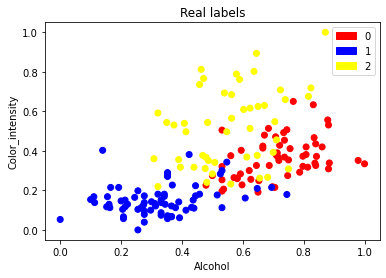

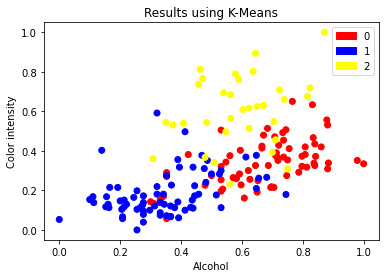

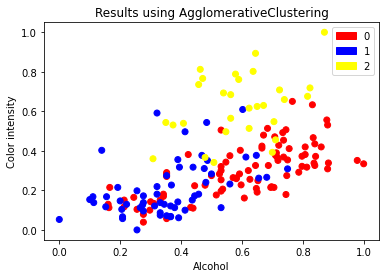

In [137]:
#COMPLETAR

plt.scatter(x,y, c=colormap[labels_])
plt.legend(handles=[class_0,class_1, class_2])
plt.title("Real labels")
plt.xlabel("Alcohol")
plt.ylabel("Color_intensity")
plt.show()


plt.scatter(x,y, c=colormap[labels_kmeans])
plt.legend(handles=[class_0,class_1, class_2])
plt.title("Results using K-Means")
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.show()


plt.scatter(x,y, c=colormap[labels_agglo])
plt.legend(handles=[class_0,class_1, class_2])
plt.title("Results using AgglomerativeClustering")
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.show()

Paso 3.3: Calcula al menos una medida de validación interna sobre cada asignación obtenida.

In [134]:
#COMPLETAR
labels_kmeans.sort()
labels_agglo.sort()

print(silhouette_score(wine_data, labels_kmeans))
print(silhouette_score(wine_data, labels_agglo))

0.09068652776020494
-0.013337072731313104


Paso 3.4: Utiliza el atributo de clase como partición de referencia y calcula al menos una medida de validación externa. Importante: Ten en cuenta que el orden de las etiquetas generadas por el método de agrupamiento podría no coincidir con el orden de las etiquetas reales. Es decir, debes comprobar que los puntos de una misma clase están agrupados juntos, con independencia del valor concreto de la etiqueta en la partición real y en la obtenida.

In [135]:
#COMPLETAR
def purity(particion_real:int, particion_obtenida:int):

  n_clus = {}

  # Inicializamos el diccionario con los distintos grupos
  for pt_o in np.unique(particion_obtenida):

    n_clus[str(pt_o)] = []

  # Creamos agrupaciones
  for pt_o, pt_r in zip(particion_obtenida, particion_real):

    n_clus[str(pt_o)].append(pt_r)

  numerator = 0

  # Seleccionamos el elemento más común del grupo y contamos el número de ocurrencias
  for key in n_clus.keys():

    most_common = max(set(n_clus[key]), key=n_clus[key].count)

    numerator += n_clus[key].count(most_common)

  return numerator / len(particion_obtenida)

purity_k_means = (labels_, labels_kmeans)
purity_agglo = (labels_, labels_agglo)

print("K-Means purity: " + str(purity_k_means))
print("AgglomerativeClustering purity: " + str(purity_agglo))

K-Means purity: 0.848314606741573
AgglomerativeClustering purity: 0.7191011235955056


*Añade aquí una breve explicación de los resultados obtenidos en el apartado 3.*

De los resultados obtenidos se puede observar que ambos algoritmos consiguen buenos resultados en cuanto a _purity_, ambos algoritmos consiguen una pureza mayor del 0.7, esto quiere decir que ambos algoritmos han conseguido clasificar correctamente más del 70% de los datos. Además, también se puede observar que el algoritmo que oferece mejores resultados usando *K-Means* que, además de tener una mayor pureza, consigue un valor más alejado de 0 para el coeficiente de silueta. 

A pesar de esto, se puede observar que los valores obtenidos no obtienen muy buenos resultados a la hora de tener en cuenta el coeficiente de silueta, siendo los valores obtenidos bastante más pequeños que 1, incluso siendo negativos para el caso de *AgglomerativeClusttering*. Este valor quiere decir que la distancia que se han calculado entre los clueters, para ambos algoritmos, no es significativa, siendo en *AgglomerativeClusttering* en donde la media de cluster mal asignados es mayor que en *K-Means*